In [1]:
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium
#  pip3 install tabulate

In [ ]:
import sys
from datetime import date

# Backup the input and output files for each day for posterity

# Change for each day
ipl_day_0 = date(2026, 2, 6)
ipl_day_cur = date.today()
day_num = abs((ipl_day_cur - ipl_day_0).days)
day = 'day_' + str(day_num)
prev_day = 'day_' + str(day_num - 1)
print(day_num)

# Change for each group
group = sys.argv[1]
print(group)
tournament = 't20_wc_2026'
results_file = f'./{group}/{tournament}_results_{day}.csv'
prev_results_file = f'./{group}/{tournament}_results_{prev_day}.csv'
leaderboard_graph_file = f'./{group}/{tournament}_leaderboard.png'
leaderboard_file = f'./{group}/{tournament}_leaderboard.txt'

ipl_mock_auction_summary = f'./{group}/AuctionSummary.csv'

2
--f=/Users/sudarshanrangarajan/Library/Jupyter/runtime/kernel-v34c606e8dda59b84f7712d27aa21ea88991bf6509.json


In [3]:
mvp_df = pd.read_csv(f'./data/mvp_{day}.csv')
mvp_df

,Player,Player Short Name,Team,Position,Pts
0,romario shepherd,r shepherd,wi,alr,207
1,suryakumar yadav,s yadav,ind,bat,206
2,tim seifert,t seifert,nz,wk,172
3,shimron hetmyer,s hetmyer,wi,bat,170
4,shadley van schalkwyk,s van schalkwyk,usa,alr,159
5,dipendra singh airee,d singh airee,nep,alr,152
6,gulbadin naib,g naib,afgh,alr,149
7,george dockrell,g dockrell,ire,bowl,145
8,will jacks,w jacks,eng,bat,141
9,jacob bethell,j bethell,eng,bat,126


In [4]:
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

FileNotFoundError: [Errno 2] No such file or directory: './--f=/Users/sudarshanrangarajan/Library/Jupyter/runtime/kernel-v34c606e8dda59b84f7712d27aa21ea88991bf6509.json/AuctionSummary.csv'

In [ ]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['AkshayM',
 'ColdTaker',
 'Sriram',
 'mahaarajanmg',
 'neela',
 'ntkesh',
 'shashaank',
 'sk',
 'sudarshan']

In [ ]:
import os
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.apply(lambda x: x.astype(str).str.lower())

fantasy_teams_df_per_mgr = {}
for mgr in fantasy_teams_df.columns:
    mgr_file = f'./{group}/{mgr}.csv'
    if not os.path.exists(mgr_file):
        df = pd.DataFrame(fantasy_teams_df[mgr])
        df.to_csv(mgr_file, index=False)
    else:
        df = pd.read_csv(mgr_file)
    fantasy_teams_df_per_mgr[mgr] = df
fantasy_teams_df


,AkshayM,ColdTaker,Sriram,mahaarajanmg,neela,ntkesh,shashaank,sk,sudarshan
0,harry brook,sanju samson,saim ayub,devon conway,matt henry,phil salt,glenn maxwell,james neesham,roston chase
1,nathan ellis,cameron green,adil rashid,glenn phillips,kusal perera,jamie overton,romario shepherd,sam curran,marco jansen
2,brendan taylor,tim seifert,jacob duffy,george linde,rashid khan,ibrahim zadran,paul stirling,mitchell santner,jason holder
3,rinku singh,abhishek sharma,tim david,axar patel,sikandar raza,salman agha,josh inglis,fazalhaq farooqi,sahibzada farhan
4,darwish rasooli,mohammad nabi,ryan rickelton,keshav maharaj,sherfane rutherford,aiden markram,shimron hetmyer,kamindu mendis,matheesha pathirana
5,abrar ahmed,fakhar zaman,shivam dube,ben duckett,travis head,noor ahmad,will jacks,ishan kishan,naseem shah
6,mohammad nawaz,mujeeb ur rahman,pathum nissanka,arshdeep singh,quinton de kock,hardik pandya,jos buttler,suryakumar yadav,jason smith
7,khawaja nafay,maheesh theekshana,xavier bartlett,shai hope,rovman powell,lockie ferguson,mitchell marsh,kagiso rabada,adam zampa
8,dushmantha chameera,lungi ngidi,tilak varma,rahmanullah gurbaz,jofra archer,varun chakravarthy,shamar joseph,jasprit bumrah,dewald brevis
9,shadab khan,wanindu hasaranga,cooper connolly,eshan malinga,daryl mitchell,brandon king,anrich nortje,dasun shanaka,david miller


In [ ]:
from thefuzz import fuzz
from thefuzz import process
            
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    mgr_df = fantasy_teams_df_per_mgr[mgr]
    mgr_day_pts = {}
    mgr_file = f'./{group}/{mgr}.csv'
    all_players_have_min_pts = True
    mvp_players_with_pts = mvp_df['Player'].to_list()
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i]).lower()
        if player_name in mvp_players_with_pts:
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            mgr_day_pts[player_name] = player_score
            print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        else:
            closest_match = process.extractOne(player_name, mvp_players_with_pts)
            mgr_day_pts[player_name] = 0.0
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name, closest match is {closest_match}')
            all_players_have_min_pts = False
    mgr_df[f'{day}'] = mgr_df.iloc[:, 0].map(mgr_day_pts)
    mgr_df = mgr_df.reindex(sorted(mgr_df.columns, key = lambda x: int(x.split("_")[1] if '_' in x else 0)), axis=1)
    mgr_df.to_csv(mgr_file, index=False)
    print(f'*{day.upper()}*\n```\n{mgr_df.to_markdown(index=False)}\n```')
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

AkshayM
	harry brook points found. Adding his score 0.0 to total. New score 0.0
	nathan ellis points found. Adding his score 0.0 to total. New score 0.0
	brendan taylor points found. Adding his score 0.0 to total. New score 0.0
	rinku singh points found. Adding his score 17.0 to total. New score 17.0
	darwish rasooli points found. Adding his score 0.0 to total. New score 17.0
	abrar ahmed points found. Adding his score 87.0 to total. New score 104.0
	mohammad nawaz points found. Adding his score 69.0 to total. New score 173.0
	khawaja nafay points found. Adding his score 0.0 to total. New score 173.0
	dushmantha chameera points found. Adding his score 0.0 to total. New score 173.0
	shadab khan points found. Adding his score 30.0 to total. New score 203.0
	finn allen points found. Adding his score 0.0 to total. New score 203.0
*DAY_1*
```
| AkshayM             |   day_1 |
|:--------------------|--------:|
| harry brook         |       0 |
| nathan ellis        |       0 |
| brendan tayl

In [ ]:
scores

{'AkshayM': 203.0,
 'ColdTaker': -20.0,
 'Sriram': 192.0,
 'mahaarajanmg': 260.0,
 'neela': 294.0,
 'ntkesh': 169.0,
 'shashaank': 483.0,
 'sk': 261.0,
 'sudarshan': 283.0}

In [ ]:
prev_scores = pd.read_csv(prev_results_file, header=None)
prev_scores = prev_scores.T
new_header = prev_scores.iloc[0]
prev_scores = prev_scores[1:]
prev_scores.columns = new_header
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'AkshayM': 0.0,
  'ColdTaker': 0.0,
  'Sriram': 0.0,
  'mahaarajanmg': 0.0,
  'neela': 0.0,
  'ntkesh': 0.0,
  'shashaank': 0.0,
  'sk': 0.0,
  'sudarshan': 0.0}]

In [ ]:
current_scores_dict = prev_scores_dicts + [scores]

In [ ]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,AkshayM,ColdTaker,Sriram,mahaarajanmg,neela,ntkesh,shashaank,sk,sudarshan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,203.0,-20.0,192.0,260.0,294.0,169.0,483.0,261.0,283.0


In [ ]:
graph_scores_t = graph_scores.T
graph_scores_t = graph_scores_t.sort_values(by=graph_scores_t.columns[-1], ascending=False)
graph_scores_t.to_csv(results_file, header=False)
graph_scores_t

,0,1
shashaank,0.0,483.0
neela,0.0,294.0
sudarshan,0.0,283.0
sk,0.0,261.0
mahaarajanmg,0.0,260.0
AkshayM,0.0,203.0
Sriram,0.0,192.0
ntkesh,0.0,169.0
ColdTaker,0.0,-20.0


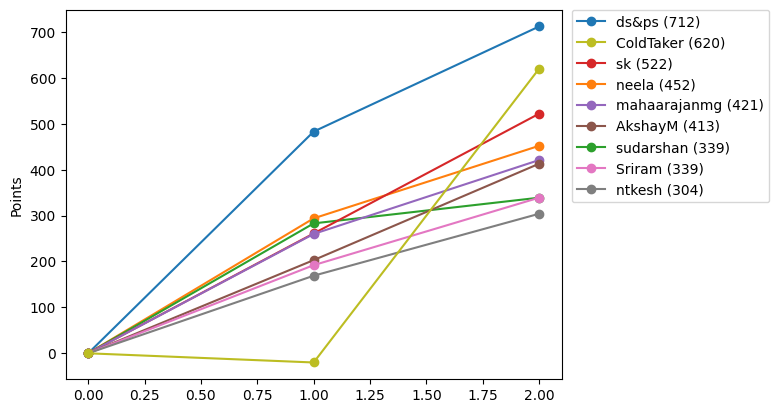

In [19]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
# Create legend labels with final scores, sorted by points (descending)
final_scores = graph_scores.iloc[-1]
sorted_cols = final_scores.sort_values(ascending=False).index
# Get handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of original column names to handles
handle_dict = dict(zip(graph_scores.columns, handles))
# Reorder handles and create new labels based on sorted columns
sorted_handles = [handle_dict[col] for col in sorted_cols]
sorted_labels = [f"{col} ({int(final_scores[col])})" for col in sorted_cols]
plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(leaderboard_graph_file, bbox_inches="tight")
plt.show()

In [20]:
scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
score_msg = str(scores_sorted)

scores_msg_df = pd.DataFrame(
    scores_sorted.items(),
    columns=['Manager', 'Points']
)
leaderboard_table = f'*{day.upper()}*\n```\n{scores_msg_df.to_markdown(index=False)}\n```'
print()
with open(leaderboard_file, 'w') as f:
    f.write(leaderboard_table)